# Robert Chang
# CSCIS-89 HW4

## Problems 1 & 2

## Problem 1. Calculate and print the value of y where x is a series of values starting with 1, incremented by 1 and ending at 9. Define variable x with a placeholder so that you could feed different values of x while calculating y. Use Session.run() method which is fed different x values through a fetch_dict(ionary) . Similarly, calculate and print values of z. Generate a TensorBoard graph of your calculations.

### Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

/home/rpchang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### I use the "with" command to create a sub-block that will keep variables in scope. I create a placeholder for x, and equations for y & z. I then start my session, using FileWriter to write the output to "prob1". I then initialize global variables and run the session. When I run the session, x values are "fetched" from a dictionary. I then close the session.

In [6]:
with tf.Graph().as_default() as g:
    x = tf.placeholder("int32", None)
    y = 2*(x*x)+5
    z = (3*y-4)/x
    sess = tf.Session()
    filewriter = tf.summary.FileWriter("prob1", sess.graph)
    sess.run(tf.global_variables_initializer())
    result = sess.run(y, feed_dict={x: np.arange(1,10)})
    print(result)
    result2 = sess.run(z, feed_dict={x: np.arange(1,10)})
    print(result2)
    sess.close()

[  7  13  23  37  55  77 103 133 167]
[17.         17.5        21.66666667 26.75       32.2        37.83333333
 43.57142857 49.375      55.22222222]


### My output is now stored in folder "prob1". I then run the command "tensorboard --logdir==training:prob1 --host=127.0.0.1" from a terminal to launch Tensor Board in my browser. Tensor Board creates a diagram of my graph. Please see the Tensor Board pdf attachment for the diagram of my graph.

## Problem 2. Consider 100 points along the straight line in (x, y) plane represented by the linear equation y = 0.3x + 0.2. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using TensorFlow API. Report on the accuracy of your model.

### I create my scatter plot in the same way I did for HW1.

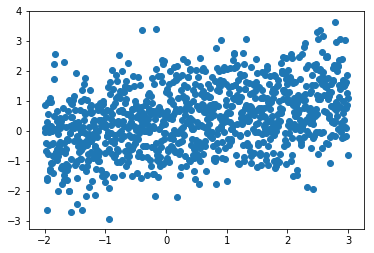

In [9]:
x_range = [-2,3]
num_points = 1000
interval = (x_range[1] - x_range[0]) / (num_points - 1)

x = []
x.append(x_range[0])
for i in range(num_points - 1):
    x.append(x[i] + interval)
    
s = np.random.normal(0, 1, num_points)

b0 = 0.2
b1 = 0.3
y = []
for i in range(len(x)):
    y.append(b1 * x[i] + b0 + s[i])
    
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=True)
    
plt.scatter(x,y)

### I then set up my neural network in tensorflow. I use 30 epochs and learning rate of 0.2, similar parameters that I used in HW1. I create placeholders for my features and labels X, Y, because I want flexibility in case the size of X, Y changes. Since this is linear regression on a single parameter, my Weight and Bias matrix both have dimension 1. My prediction is XW+B. My loss function is MSE. I optimize using a standard tensorflow Gradient Descent optimizer.

In [23]:
n = len(xTrain)
epochs = 30
learning_rate = 0.2
X = tf.placeholder("float") 
Y = tf.placeholder("float")
W = tf.Variable(tf.random_uniform(shape =(1,1)),name = "W")
B = tf.Variable(tf.random_uniform(shape=(1,)), name = "B")
y_pred = tf.add(tf.multiply(X, W), B)
loss = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

### I then run my session in tensorflow. I initialize global variables. For each epoch I feed all the X, Y values to the optimizer and to the loss equation. I don't have to manually calculate the gradient and adjust the Weights and Bias, the tensorflow GradientDescentOptimizer automatically computes gradients for variables that are involved in the cost computation. I then print results for each epoch and store the final accuracy, Weights and Bias.

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess: 
    # Initializing the Variables 
    sess.run(init) 
    # Iterating through all the epochs 
    for epoch in range(epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(xTrain, yTrain): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Calculating the cost a every epoch 
        c = sess.run(loss, feed_dict = {X : x, Y : y}) 
        print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(B)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(loss, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(B)
    sess.close()

Epoch 1 : cost = 0.93281966 W = [[0.7168085]] b = [0.32911277]
Epoch 2 : cost = 0.7459071 W = [[0.5508162]] b = [0.2868949]
Epoch 3 : cost = 0.6767148 W = [[0.44896424]] b = [0.26337782]
Epoch 4 : cost = 0.65109885 W = [[0.38630664]] b = [0.25091064]
Epoch 5 : cost = 0.64159375 W = [[0.34762537]] b = [0.24488516]
Epoch 6 : cost = 0.63803726 W = [[0.32363248]] b = [0.24253899]
Epoch 7 : cost = 0.6366757 W = [[0.3086565]] b = [0.2422271]
Epoch 8 : cost = 0.6361261 W = [[0.29923066]] b = [0.24297981]
Epoch 9 : cost = 0.6358794 W = [[0.2932336]] b = [0.24423362]
Epoch 10 : cost = 0.6357494 W = [[0.28936592]] b = [0.24566847]
Epoch 11 : cost = 0.63566756 W = [[0.2868288]] b = [0.24710824]
Epoch 12 : cost = 0.6356085 W = [[0.2851307]] b = [0.24846292]
Epoch 13 : cost = 0.63556206 W = [[0.28396818]] b = [0.24969049]
Epoch 14 : cost = 0.63552445 W = [[0.2831517]] b = [0.2507781]
Epoch 15 : cost = 0.6354934 W = [[0.28256318]] b = [0.25172725]
Epoch 16 : cost = 0.63546735 W = [[0.2821277]] b = [

### I then examine the model performance on the test dataset. The plot shows the model predictions on the test data vs. the actuals. The model estimated Weights and Bias are similar to the 0.3 and 0.2 parameters given in the problem.  

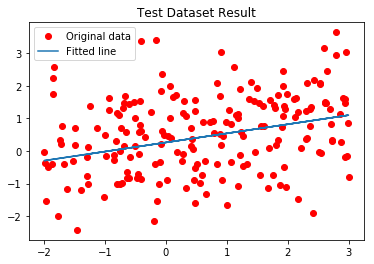

In [27]:
pred = weight * xTest + bias
# Plotting the Results 
plt.plot(xTest, yTest, 'ro', label ='Original data') 
plt.plot(xTest, np.transpose(pred), label ='Fitted line') 
plt.title('Test Dataset Result') 
plt.legend() 
plt.show() 